# Ad-hoc analysis / inspect output of simple_mm


In [29]:
import requests, json
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import asyncio
import os
import json
import copy
import matplotlib.pyplot as plt

from simple_mm import *

MARKET_INDEX_SOL = 0
userAccount       = "ECbtn9Y34m6L89EBDMRYxhpyrFgSHEcbELgozpqAvcDY"
PKEY              = "7f6d3DWGkNrKTERtW9McbBQCVbZibuHUf7CsdUjJyK1t"
URL_ORDERS_SELF   = f"https://master.api.drift.trade/orders/userAccounts?userPublicKeys={PKEY}&pageIndex=0&pageSize=100&marketType=perp"
URL_HISTORY_SELF  = f"https://beta.drift.trade/overview/history/tradeHistory?userAccount={PKEY}"
URL_DEVNET_OB     = "https://master.dlob.drift.trade/orders/json"

In [30]:
df = pd.read_pickle("history.h5").T
df["mm_bid"] = df["mm_bid_offsets"].apply(lambda x : x[0]) # Take most competitive bid
df["mm_ask"] = df["mm_ask_offsets"].apply(lambda x : x[0])


df[["oraclePrice", "ob_mid", "ob_bid", "ob_ask", "mm_bid", "mm_ask", "time"]]


,oraclePrice,ob_mid,ob_bid,ob_ask,mm_bid,mm_ask,time
1,23.843457,3.077753,-0.001037,6.156543,0.000833,0.001683,2023-04-30 11:21:35.380962
2,23.82754,3.090426,0.008392,6.17246,0.000833,0.001683,2023-04-30 11:21:48.858182
3,23.816782,3.092658,0.002098,6.183218,0.000833,0.001683,2023-04-30 11:22:03.533956
4,23.80225,3.103075,0.0084,6.19775,0.000833,0.001683,2023-04-30 11:22:25.326150
5,23.790085,3.107957,0.005998,6.209915,0.000833,0.001683,2023-04-30 11:22:47.911115
6,23.80657,3.098092,0.002755,6.19343,0.000833,0.001683,2023-04-30 11:23:02.758657
7,23.817875,3.090253,-0.001619,6.182125,0.000833,0.001683,2023-04-30 11:23:18.901297
8,23.831622,3.083161,-0.002056,6.168378,0.000833,0.001683,2023-04-30 11:23:32.866566
9,23.831665,3.084114,-0.000108,6.168335,0.000833,0.001683,2023-04-30 11:23:47.663617
10,23.828437,3.089125,0.006686,6.171563,0.000833,0.001683,2023-04-30 11:24:02.721787


<Axes: title={'center': 'Orderbook bid vs Market Maker Bid (relative to oracle)'}>

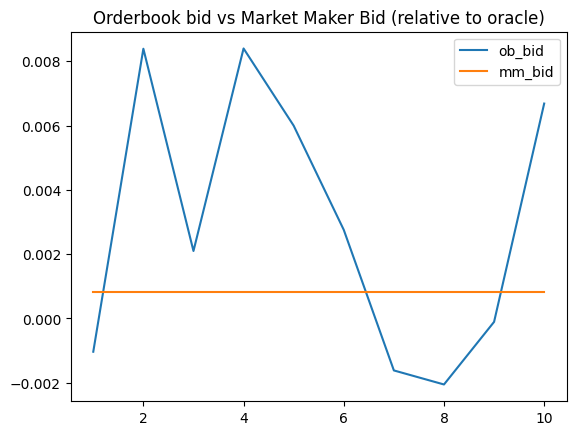

In [31]:
df[["ob_bid","mm_bid"]].plot(title="Orderbook bid vs Market Maker Bid (relative to oracle)")

<Axes: title={'center': 'Orderbook Ask vs Market Maker Ask (relative to Oracle)'}>

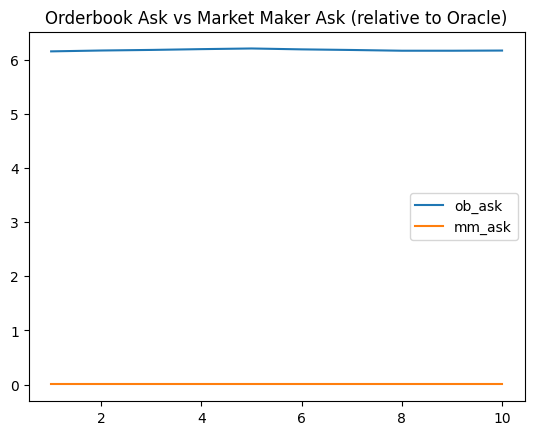

In [32]:
df[["ob_ask","mm_ask"]].plot(title="Orderbook Ask vs Market Maker Ask (relative to Oracle)")